#### Замятина Екатерина
#### 476 группа

# Получите  численное  решение  следующих  нелинейных  краевых задач:

$$ a)\hspace{5mm} y^" + p*x*\cos(y) = 0, \hspace{1cm} 0<x\leq 1$$
$$ y(0)=0; \hspace{5mm} y'(1)=0, p=1,4,7,25,50,100 $$

## Теоретическая часть

### Метод стрельбы

Будем сводить решение краевой задачи к задачи Коши вида:

$$ y" = f(x,y,y') \hspace{1cm} 0<x\leq 1$$
$$y(0) = 0;\hspace{15mm} y'(0)=\alpha$$
При этом: $ \hspace{8,5cm} y(x,\alpha)|_{x=1}=y(1,\alpha)= F(\alpha) = 0$


Как видно из строчки выше, для этого нам надо решить уравнение $F(\alpha)=0$.

Будем решать методом Ньютона.

Задаем $\alpha_0 = 0$

$\alpha_{n+1} = \alpha_n - \dfrac{F(\alpha_n)}{F'(\alpha_n)} = \alpha_n - \dfrac{y(1,\alpha_n)}{y'(1,\alpha_n)}$

Для нахождения y', y будем решать Задачу Коши выписанную выше (но все равно ее продублируем):

$$\begin{equation*}
 \begin{cases}
   y"(x,\alpha) = f(x,y,y')& x\in[0,1]\\
   y(0,\alpha) = 0 & y'(0,\alpha) = \alpha
 \end{cases}
\end{equation*}  \hspace{5mm}(1)
$$

Продифференцируем уравнение по $\alpha$:

$$ \frac{\partial y^"(x,\alpha)}{\partial \alpha} = \dfrac{\partial f}{\partial x} \dfrac{\partial x}{\partial \alpha} + \dfrac{\partial f}{\partial y} \dfrac{\partial y}{\partial \alpha} + \dfrac{\partial f}{\partial y'}  \dfrac{\partial y'}{\partial \alpha} $$

Причем $\dfrac{\partial x}{\partial \alpha} = 0$, так как x не зависит от $\alpha$.

Введем новую переменную: $z(\alpha, x) = \dfrac{\partial y}{\partial \alpha}$

Тогда начальные условия перепишутся в виде:

$z(0,\alpha) = 0 \hspace{10mm} z'(0, \alpha) = 1$


Уравнение в новых переменных:

$$\begin{equation*}
 \begin{cases}
  z^"(x, \alpha) = \dfrac{\partial f}{\partial y} z(x,\alpha) + \dfrac{\partial f}{\partial y'}z'(x,\alpha) & x\in[0,1]\\
   z(0,\alpha) = 0 & z'(0,\alpha) = 1 &
 \end{cases}
\end{equation*} \hspace{5mm} (2)
$$

Тогда для задачи Ньютона получим:


$$\alpha_{n+1} = \alpha_n - \dfrac{y(1,\alpha_n)}{z(1,\alpha_n)} \hspace {1cm} \alpha_0 = 0$$

### Решение задачи Коши

Перепишем задачу Коши (2) (1) для нашего уравнения:

\begin{equation}
 \begin{cases}
  z^"(x, \alpha) = px \sin(y)*z(x,\alpha) & x\in[0,1]\\
   z(0,\alpha) = 0 & z'(0,\alpha) = 1 \\
   \\
   y^"(x,\alpha) = -px \cos(y)& x\in[0,1]\\
   y(0,\alpha) = 0 & y'(0,\alpha) = \alpha
 \end{cases}
\end{equation} 


Сведем получившиеся системы к системе первого порядка:


\begin{equation}
 \begin{cases}
  v'(x, \alpha) = px \sin(y)*z(x,\alpha) & x\in[0,1]\\
   v(0,\alpha) = 1 \\
   \\
   z'_x(x, \alpha) = v(x, \alpha) \\
   z(0,\alpha) = 0 \\
   \\
   u_x'(x,\alpha) = -px \cos(y)& x\in[0,1]\\
   u(0,\alpha) = \alpha \\
   \\
   y'_x(x, \alpha)=u(x, \alpha) \\
   y(0,\alpha) = 0 \\
 \end{cases}
\end{equation}

Каждое уравнение можно решить явным Методом Ругне Кутта второго порядка:
\begin{equation}
 \begin{cases}
  w(x)' = f(w,x)\\
  w(0) = w_0\\
 \end{cases}
\end{equation}


$$w_{n+1} = w_n +h(b_1r_1 + b_2r_2) = w_n + hr_2$$


$$r1=f(w_n,x_n)$$

$$r2=f(w_n + \frac{h}{2},w_n+ \frac{h}{2}r_1)$$

$$w = (v,z,u,y)^T \hspace{1cm} w_0 =(1,0,\alpha, 0)^T$$

## Практическая часть

### Решение Задачи Коши

In [2]:
import numpy as np

In [3]:
p = 1

In [4]:

def f(x,w):
    v = w[0]
    z = w[1]
    u = w[2]
    y = w[3]
    f = np.ndarray(4)
    
    f[0] = p*x*np.sin(y)*z
    f[1] = v
    f[2] = -p*x*np.cos(y)
    f[3] = u
    return f

In [84]:
def Runge_Kutta_method(w0,n, marker_end_of_Newton_method = "no"):
    x0 = 0
    h = 1./n
    y = []
    for i in range(n):
        r1=f(x0,w0)
        w = w0 + h*f(x0 + 0.5*h, w0 + 0.5*h*r1)
        w0 = w
        x0 = x0 + h 
        if (marker_end_of_Newton_method == "end"):
            y.append(w0[3])
    return w[1], w[3], y

### Решение метода Ньютона

$$\alpha_{n+1} = \alpha_n - \dfrac{y(1,\alpha_n)}{z(1,\alpha_n)} \hspace {1cm} \alpha_0 = 0$$
где y z находим из Newton_method

In [82]:
def Newton_method(eps):
    a0 = 0
    n = 10000
    a = 1000
    y = 1
    z =1
    while ((y/z)*(y/z) > eps*eps):
        w0 = np.array([1,0,a0,0])
        z,y, mass_y = Runge_Kutta_method(w0,n)
        a = a0 - y/z
        a0 = a
    z,y, mass_y = Runge_Kutta_method(w0,n, "end")
    return y, mass_y, a

In [87]:
y,mass_y, a = Newton_method(0.0001)

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

# График y(x) - решение уравнения

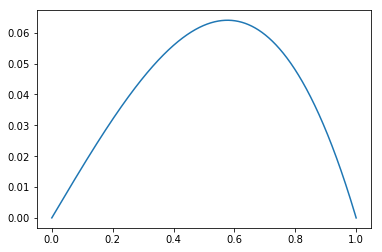

In [91]:
 plt.plot(np.linspace(0,1,len(mass_y)), mass_y)

### Найденные параметры альфа и y[1]

In [94]:
('y[1] = {}, alpha = {}').format(y , a)

'y[1] = 1.20762935931e-08, alpha = 0.166441427199'